# Sectors clustering in the stock market
## Scientific Python project
### Ludovico Napoli
ludoviconapoli94@gmail.com


Companies that are listed in the stock market are grouped together, based on the sector in which they are considered to belong. It is important for an investor to lower the overall risk of their portfolios. A balanced and well-diversified portfolio enables investors to access a differentiated source of return and to be less affected during market crises. We expect the stock prices of companies in the same sector to be more correlated than the ones of companies in different sectors. In this project, we are interested in investigating whether it is true that sectors move together in the stock market and to what extent, by performing a data-driven analysis. Clustering analysis enables us to spot the groups of correlated companies and we will find that the sector grouping is actually reflected in the clustering.


## Historical data collection

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import numpy as np



The historical data of stock prices is freely available in Yahoo! Finance:

https://finance.yahoo.com/

We have access to opening, closing, daily high and daily low price values of listed companies for almost every week day. To avoid problems regarding the heterogeneity of the market, we only consider companies that are listed in the New York Stock Exchange (NYSE). We consider the closing price, but the same analysis can be done with the other variables.

We consider the companies that are in the NYSE Top US 100 Components Index (which for some reason are less than 100), the list of which can be easily be downloaded here:

https://www.investing.com/indices/nyse-us-100-components

The csv file of this is called 'NYSE TOP US 100 Components.csv'. We then collect the historical data of these companies from Yahoo Finance with pandas, that has a simple remote data access for the Yahoo! Finance API data. Since it takes a couple of minutes to request the data, we also provide the 'cleaned.csv' file with the data that we have collected and cleaned and that we need for our analysis:




In [3]:
#df = pd.read_csv('./data/cleaned.csv', index_col = 0)
#df.index = pd.to_datetime(df.index)
#df.head()

,MMM,ABT,ACN,AIG,AGN,MO,T,BAC,BK,BAX,...,UTX,UNH,USB,VZ,V,WBA,WMT,DIS,WFC,YUM
2008-03-19,79.470001,26.096321,34.380001,843.599976,28.670000,70.779999,36.049999,38.560001,43.240002,31.499186,...,68.760002,35.549999,32.930000,32.795490,14.1250,36.380001,50.779999,31.240000,30.580000,26.024443
2008-03-20,77.980003,26.705667,34.610001,900.200012,28.740000,70.260002,36.849998,41.860001,46.389999,31.531776,...,69.010002,35.320000,34.520000,33.719704,16.0875,36.779999,53.230000,31.900000,32.549999,26.887131
2008-03-21,77.980003,26.705667,34.610001,900.200012,28.740000,70.260002,36.849998,41.860001,46.389999,31.531776,...,69.010002,35.320000,34.520000,33.719704,16.0875,36.779999,53.230000,31.900000,32.549999,26.887131
2008-03-24,78.639999,26.595314,36.310001,922.200012,29.110001,71.680000,38.029999,42.450001,44.029999,31.586094,...,70.339996,35.709999,34.669998,34.513218,14.9325,38.610001,53.630001,32.040001,32.090000,27.253775
2008-03-25,78.980003,26.163494,35.380001,916.200012,29.059999,73.330002,38.000000,40.970001,44.349998,31.613255,...,70.160004,35.279999,34.810001,34.447868,15.8125,38.009998,53.049999,32.080002,32.060001,27.455069


To collect the companies' respective sectors, we use <code>yahoofinance</code>, a python library to get data from Yahoo! Finance. It can be easily installed with:

<code>
pip install yahoofinance
</code>

If needed, the commented cell to install it is provided below.

In [0]:
#!pip install yahoofinance

In [7]:
#csv file with the listed companies, only the 'Symbol' column values

top = pd.read_csv( './data/NYSE TOP US 100 Components.csv' )['Symbol'].values 

print('NYSE Top 100 components:\n', top)


NYSE Top 100 components:
 ['MMM' 'ABT' 'ACN' 'AIG' 'AGN' 'MO' 'T' 'BKR' 'BAC' 'BK' 'BAX' 'BRKb' 'BA'
 'BMY' 'CAT' 'C' 'KO' 'CL' 'GLW' 'DHR' 'DE' 'DVN' 'D' 'DUK' 'DD' 'LLY'
 'EMR' 'EOG' 'EXC' 'XOM' 'FDX' 'F' 'BEN' 'FCX' 'GD' 'GE' 'GIS' 'GM' 'GS'
 'HAL' 'HD' 'HON' 'HPQ' 'IBM' 'ITW' 'JNJ' 'JPM' 'KMB' 'LVS' 'LMT' 'LOW'
 'MA' 'MCD' 'MRK' 'MET' 'MS' 'NOV' 'NEM' 'NKE' 'OXY' 'PEP' 'PFE' 'PM'
 'PNC' 'PG' 'PRU' 'SLB' 'SPG' 'SO' 'SCCO' 'TGT' 'TRV' 'UNP' 'UPS' 'UTX'
 'UNH' 'USB' 'VZ' 'V' 'WBA' 'WMT' 'DIS' 'WFC' 'YUM']


In [0]:
#date range (we will eventually consider roughly ten years of time series)

start_date = datetime.date(2000,1,1)
end_date = datetime.date.today()

#check whether there are problems with some companies and collect all the time series

bad = []

for i in top:
  try:
    df = data.DataReader(i, 'yahoo', start_date, end_date)
  except:
    print('Bad: ', i)
    bad.append(i)

good = top[~np.isin(top, bad)]

df = data.DataReader(good, 'yahoo', start_date, end_date)

In [9]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5001 entries, 2000-01-03 to 2019-11-15
Columns: 504 entries, (High, MMM) to (Adj Close, YUM)
dtypes: float64(504)
memory usage: 19.3 MB
None


Attributes      High                 ...  Adj Close                    
Symbols          MMM        ABT ACN  ...        DIS       WFC       YUM
Date                                 ...                               
2000-01-03  48.25000  16.160431 NaN  ...  23.253712  9.355715  4.441077
2000-01-04  47.40625  15.599305 NaN  ...  24.615856  8.892412  4.351810
2000-01-05  48.12500  15.402911 NaN  ...  25.637463  8.802740  4.374127
2000-01-06  51.25000  15.823756 NaN  ...  24.615856  9.191320  4.336933
2000-01-07  51.90625  16.272657 NaN  ...  24.226673  9.355715  4.240226

[5 rows x 504 columns]

We can see that the dataframe is a "3D" dataframe with a column multiindex (price attribute, company). It contains the temporal series of all the companies for 5 different attributes: High, Low, Close, Open, Adj. Close. We consider only the Close attribute.

## Data cleaning

We would like to have a dataframe with the time series of roughly ten years, indeed we drop the companies which are listed since less than ten years (which are roughly $ 52.15\times 5\times 10 $ week days). Then, we start our time series from the youngest listed companies start date. Then, we make sure that all weekdays are included in our dataset, which is often desirable for trading strategies. If some week day values are missing, we fill them with the latest available price.

In [10]:
df = df['Close']  #take only closing prices

#drop the companies listed since less than roughly ten years
drop = []

for col in df.columns:
  if len(df[~df[col].isna()]) < 52.15*5*10:
    drop.append(col)

#test whether in the remaining time series there are other nan entries than the
#ones which are necessarily missing because the company was not listed yet.

test = df.drop(columns = drop).dropna()
first = test.index[0]

print(len(test) == len(df[first:]))

#since this is not the case, dropping nan values will automatically give us
#the time series starting from the date in which the youngest company was listed.

df = df.drop(columns = drop).dropna()

#add missing weekdays and fill with the last available value

weekdays = pd.date_range(start=df.index[0], end=df.index[-1], freq='B')
df = df.reindex(weekdays)
df = df.fillna(method='ffill')
df.head()

True


Symbols,MMM,ABT,ACN,AIG,AGN,MO,T,BAC,BK,BAX,BA,BMY,CAT,C,KO,CL,GLW,DHR,DE,DVN,D,DUK,DD,LLY,EMR,EOG,EXC,XOM,FDX,F,BEN,FCX,GD,GE,GIS,GS,HAL,HD,HON,HPQ,...,ITW,JNJ,JPM,KMB,LVS,LMT,LOW,MA,MCD,MRK,MET,MS,NOV,NEM,NKE,OXY,PEP,PFE,PM,PNC,PG,PRU,SLB,SPG,SO,SCCO,TGT,TRV,UNP,UPS,UTX,UNH,USB,VZ,V,WBA,WMT,DIS,WFC,YUM
2008-03-19,79.470001,26.096321,34.380001,843.599976,28.670000,70.779999,36.049999,38.560001,43.240002,31.499186,73.449997,21.459999,73.730003,204.100006,29.980,38.639999,23.690001,28.411676,79.489998,96.750000,40.130001,53.250000,51.821251,49.970001,48.520000,56.560001,79.099998,84.430000,86.230003,5.45,31.036667,43.799999,85.040001,34.221153,29.459999,166.490005,35.880001,26.840000,52.540195,21.158039,...,47.860001,64.879997,42.470001,61.802494,72.650002,100.709999,21.990000,20.839001,53.660000,42.990002,52.112301,43.450001,47.114517,48.720001,15.457500,66.269112,70.180000,20.610001,50.099998,63.500000,67.809998,71.470001,80.169998,84.841560,35.279999,33.153332,50.139999,46.410000,31.075001,70.639999,68.760002,35.549999,32.930000,32.795490,14.1250,36.380001,50.779999,31.240000,30.580000,26.024443
2008-03-20,77.980003,26.705667,34.610001,900.200012,28.740000,70.260002,36.849998,41.860001,46.389999,31.531776,74.800003,21.459999,73.820000,225.000000,30.520,38.750000,23.969999,28.957544,79.230003,96.290001,40.750000,54.720001,51.920879,49.840000,49.070000,56.134998,80.400002,85.000000,87.019997,5.62,33.046665,43.540001,85.660004,36.048077,30.059999,179.630005,36.230000,28.059999,51.758430,21.117167,...,48.320000,65.379997,45.970001,62.291466,76.959999,100.050003,23.230000,22.038000,54.419998,43.360001,53.654190,49.669998,46.429214,45.970001,16.817499,67.006813,71.190002,20.590000,49.150002,67.510002,69.370003,76.099998,80.639999,88.192154,36.130001,33.233334,52.349998,47.790001,30.514999,71.660004,69.010002,35.320000,34.520000,33.719704,16.0875,36.779999,53.230000,31.900000,32.549999,26.887131
2008-03-21,77.980003,26.705667,34.610001,900.200012,28.740000,70.260002,36.849998,41.860001,46.389999,31.531776,74.800003,21.459999,73.820000,225.000000,30.520,38.750000,23.969999,28.957544,79.230003,96.290001,40.750000,54.720001,51.920879,49.840000,49.070000,56.134998,80.400002,85.000000,87.019997,5.62,33.046665,43.540001,85.660004,36.048077,30.059999,179.630005,36.230000,28.059999,51.758430,21.117167,...,48.320000,65.379997,45.970001,62.291466,76.959999,100.050003,23.230000,22.038000,54.419998,43.360001,53.654190,49.669998,46.429214,45.970001,16.817499,67.006813,71.190002,20.590000,49.150002,67.510002,69.370003,76.099998,80.639999,88.192154,36.130001,33.233334,52.349998,47.790001,30.514999,71.660004,69.010002,35.320000,34.520000,33.719704,16.0875,36.779999,53.230000,31.900000,32.549999,26.887131
2008-03-24,78.639999,26.595314,36.310001,922.200012,29.110001,71.680000,38.029999,42.450001,44.029999,31.586094,76.290001,21.270000,76.029999,232.699997,30.590,38.810001,24.620001,29.336618,81.449997,99.160004,40.689999,54.029999,53.600338,50.099998,50.740002,57.005001,79.930000,85.949997,90.769997,5.96,34.233334,44.380001,85.360001,35.961540,29.815001,178.880005,36.630001,29.260000,52.444859,21.766577,...,49.419998,64.889999,46.549999,62.281879,82.900002,100.779999,24.290001,21.650000,55.770000,44.250000,54.830658,48.750000,48.575294,45.459999,17.270000,67.773262,71.449997,20.610001,51.000000,68.809998,69.970001,78.089996,81.269997,86.159523,35.770000,33.953335,53.639999,47.689999,31.389999,73.360001,70.339996,35.709999,34.669998,34.513218,14.9325,38.610001,53.630001,32.040001,32.090000,27.253775
2008-03-25,78.980003,26.163494,35.380001,916.200012,29.059999,73.330002,38.000000,40.970001,44.349998,31.613255,75.900002,21.600000,76.639999,234.199997,30.705,39.044998,25.139999,29.624716,82.239998,102.930000,40.500000,53.400002,53.884995,50.169998,51.900002,58.110001,78.980003,85.199997,91.449997,6.00,34.639999,46.205002,85.010002,35.836540,29.625000,179.630005,37.450001,28.760000,53.388695,21.916439,...,49.910000,64.550003,46.060001,62.732502,82.8300

We are left with the stock price series of 81 companies, starting from the 19th March 2008. Now we can request the companies' respective sectors with yahoofinance.

In [11]:
import yahoofinance as yf

names = df.columns.values

profile = { i: yf.AssetProfile(i) for i in names}
sector = { i: profile[i].profile['sector'] for i in names }

sector

{'ABT': 'Healthcare',
 'ACN': 'Technology',
 'AGN': 'Healthcare',
 'AIG': 'Financial',
 'BA': 'Industrial Goods',
 'BAC': 'Financial',
 'BAX': 'Healthcare',
 'BEN': 'Financial',
 'BK': 'Financial',
 'BMY': 'Healthcare',
 'C': 'Financial',
 'CAT': 'Industrial Goods',
 'CL': 'Consumer Goods',
 'D': 'Utilities',
 'DD': 'Basic Materials',
 'DE': 'Industrial Goods',
 'DHR': 'Industrial Goods',
 'DIS': 'Services',
 'DUK': 'Utilities',
 'DVN': 'Basic Materials',
 'EMR': 'Industrial Goods',
 'EOG': 'Basic Materials',
 'EXC': 'Utilities',
 'F': 'Consumer Goods',
 'FCX': 'Basic Materials',
 'FDX': 'Services',
 'GD': 'Industrial Goods',
 'GE': 'Industrial Goods',
 'GIS': 'Consumer Goods',
 'GLW': 'Technology',
 'GS': 'Financial',
 'HAL': 'Basic Materials',
 'HD': 'Services',
 'HON': 'Industrial Goods',
 'HPQ': 'Technology',
 'IBM': 'Technology',
 'ITW': 'Industrial Goods',
 'JNJ': 'Healthcare',
 'JPM': 'Financial',
 'KMB': 'Consumer Goods',
 'KO': 'Consumer Goods',
 'LLY': 'Healthcare',
 'LMT': '

In finance, it is usual to work with returns rather than with prices. In fact, the price time series $p(t)$ is a non stationary process. We will consider the relative returns $r(t)$, which are the relative variation of prices and are defined as:

$$ r(t)=\frac{p(t) - p(t-1)}{p(t)}  $$

In [12]:
rt = df.pct_change(1)
rt.head()

Symbols,MMM,ABT,ACN,AIG,AGN,MO,T,BAC,BK,BAX,BA,BMY,CAT,C,KO,CL,GLW,DHR,DE,DVN,D,DUK,DD,LLY,EMR,EOG,EXC,XOM,FDX,F,BEN,FCX,GD,GE,GIS,GS,HAL,HD,HON,HPQ,...,ITW,JNJ,JPM,KMB,LVS,LMT,LOW,MA,MCD,MRK,MET,MS,NOV,NEM,NKE,OXY,PEP,PFE,PM,PNC,PG,PRU,SLB,SPG,SO,SCCO,TGT,TRV,UNP,UPS,UTX,UNH,USB,VZ,V,WBA,WMT,DIS,WFC,YUM
2008-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-20,-0.018749,0.023350,0.006690,0.067093,0.002442,-0.007347,0.022191,0.085581,0.072849,0.001035,0.018380,0.000000,0.001221,0.102401,0.018012,0.002847,0.011819,0.019213,-0.003271,-0.004755,0.015450,0.027606,0.001923,-0.002602,0.011336,-0.007514,0.016435,0.006751,0.009161,0.031193,0.064762,-0.005936,0.007291,0.053386,0.020367,0.078924,0.009755,0.045455,-0.014879,-0.001932,...,0.009611,0.007707,0.082411,0.007912,0.059325,-0.006553,0.056389,0.057536,0.014163,0.008607,0.029588,0.143153,-0.014545,-0.056445,0.087983,0.011132,0.014392,-0.000970,-0.018962,0.063150,0.023006,0.064782,0.005863,0.039492,0.024093,0.002413,0.044077,0.029735,-0.018021,0.014439,0.003636,-0.006470,0.048284,0.028181,0.138938,0.010995,0.048247,0.021127,0.064421,0.033149
2008-03-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-03-24,0.008464,-0.004132,0.049119,0.024439,0.012874,0.020211,0.032022,0.014095,-0.050873,0.001723,0.019920,-0.008854,0.029938,0.034222,0.002294,0.001548,0.027117,0.013091,0.028020,0.029806,-0.001472,-0.012610,0.032346,0.005217,0.034033,0.015498,-0.005846,0.011176,0.043094,0.060498,0.035909,0.019293,-0.003502,-0.002401,-0.008150,-0.004175,0.011041,0.042766,0.013262,0.030753,...,0.022765,-0.007495,0.012617,-0.000154,0.077183,0.007296,0.045631,-0.017606,0.024807,0.020526,0.021927,-0.018522,0.046223,-0.011094,0.026907,0.011438,0.003652,0.000971,0.037640,0.019256,0.008649,0.026150,0.007812,-0.023048,-0.009964,0.021665,0.024642,-0.002093,0.028674,0.023723,0.019272,0.011042,0.004345,0.023533,-0.071795,0.049755,0.007515,0.004389,-0.014132,0.013636
2008-03-25,0.004324,-0.016237,-0.025613,-0.006506,-0.001718,0.023019,-0.000789,-0.034865,0.007268,0.000860,-0.005112,0.015515,0.008023,0.006446,0.003759,0.006055,0.021121,0.009820,0.009699,0.038019,-0.004669,-0.011660,0.005311,0.001397,0.022862,0.019384,-0.011885,-0.008726,0.007491,0.006711,0.011879,0.041122,-0.004100,-0.003476,-0.006373,0.004193,0.022386,-0.017088,0.017997,0.006885,...,0.009915,-0.005240,-0.010526,0.007235,-0.000844,0.012106,-0.025113,0.039169,0.007710,0.009491,-0.004226,0.014359,0.046965,0.029916,-0.010278,0.014419,0.001260,0.008248,0.014706,-0.014242,-0.006145,-0.011653,0.016857,0.026608,-0.001677,0.021205,-0.003729,0.001468,0.027477,-0.000273,-0.002559,-0.012041,0.004038,-0.001893,0.058932,-0.015540,-0.010815,0.001248,-0.000935,0.007386


## Data exploration

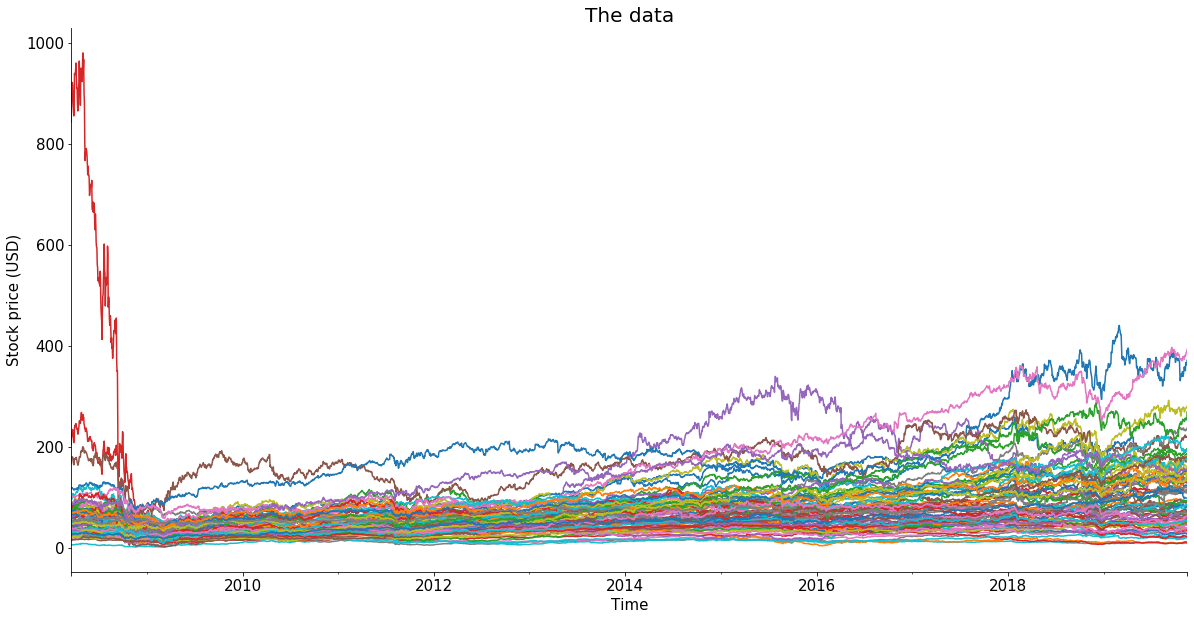

In [13]:
#all the time series together

fig, ax = plt.subplots(1,1, figsize=(20,10))
df.plot(ax=ax, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Stock price (USD)', fontsize=15)
plt.title('The data', fontsize=20);

Even though it is hard to spot single time series when plotted all together, we can understand that we are facing non-stationary processes. We can also see the macroscopic effect of the financial crisis in late 2008, a turning point in many historical series. The evident red drop is the violent drop of the giant insurance company AIG, at which we'll look a bit close below.

A time series $P(t)$ can be decomposed in different components: the trend $T(t)$, the seasonality $S(t)$, and the noise $N(t)$. If we are considering an additive model, the time series decomposition is simply:

$$  P(t) = T(t) + S(t) + N(t) $$

Though time-series decomposition is useful for forecasting (which is not the purpose of this project), it is interesting just to look at the different components of a stock price time series. We show the example of AIG between March and December 2008. During the subprime mortgage crisis of that period, the giant insurance company was about to fail, before being bailed out by the US goverment for \$180 billion, to prevent the cascading failure of other giant financial institutions that were its partner. We can see the evident negative trend of the AIG stock price and, in particular, the impressive drop in mid-September. We can also see the instability of that period, reflected in the noise component.


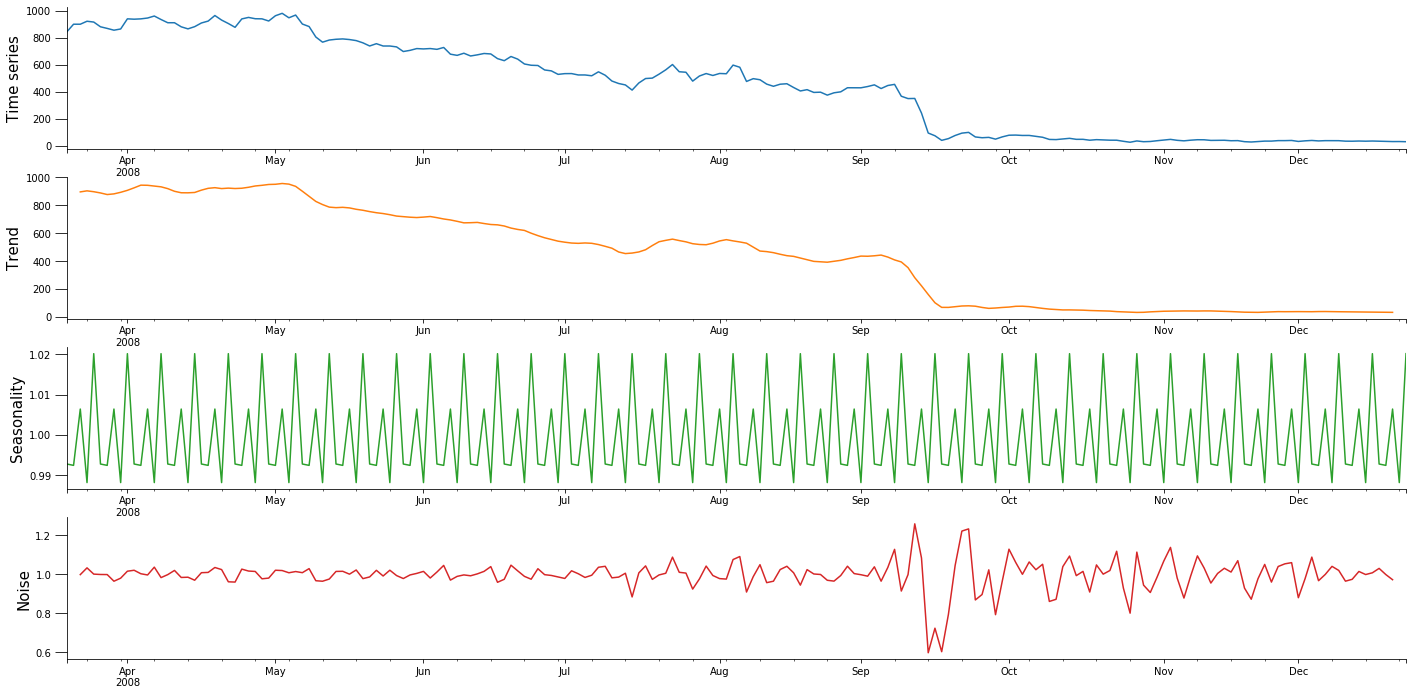

In [14]:
import statsmodels.api as sm
dec = sm.tsa.seasonal_decompose( df.AIG[:200], model='multiplicative')
fig, ax = plt.subplots(4,1,figsize=(24,12))
df.AIG[:200].plot(ax=ax[0])
dec.trend.plot(ax=ax[1], color = 'tab:orange')
dec.seasonal.plot(ax=ax[2], color = 'tab:green')
dec.resid.plot(ax=ax[3], color = 'tab:red')
l = ['Time series', 'Trend', 'Seasonality', 'Noise']
for i in range(4):
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].set_ylabel(l[i], fontsize=15)
  ax[i].tick_params('y',size=12)
plt.show()


We also plot hereunder the behavior of some of the major financial institution stocks during the financial crisis: AIG, JPMorgan, Goldman Sachs, Bank of America, and Wells Fargo. We plot the variation with respect to the initial value, for the sake of visualization, in the period March 2008 - February 2010. We can see that they all experienced a clearly negative trend, until around March 2009, when, except AIG, they started to rise again (the turning point we were mentioning before). We also plot the respective return values of such stocks, so that the instability of the crisis period is clearly evident (the returns measure the relative variations of prices). For example, AIG reached a return negative peak of roughly -0.6, meaning that in one day its stocks lost 60% of their value, which is at least remarkable.


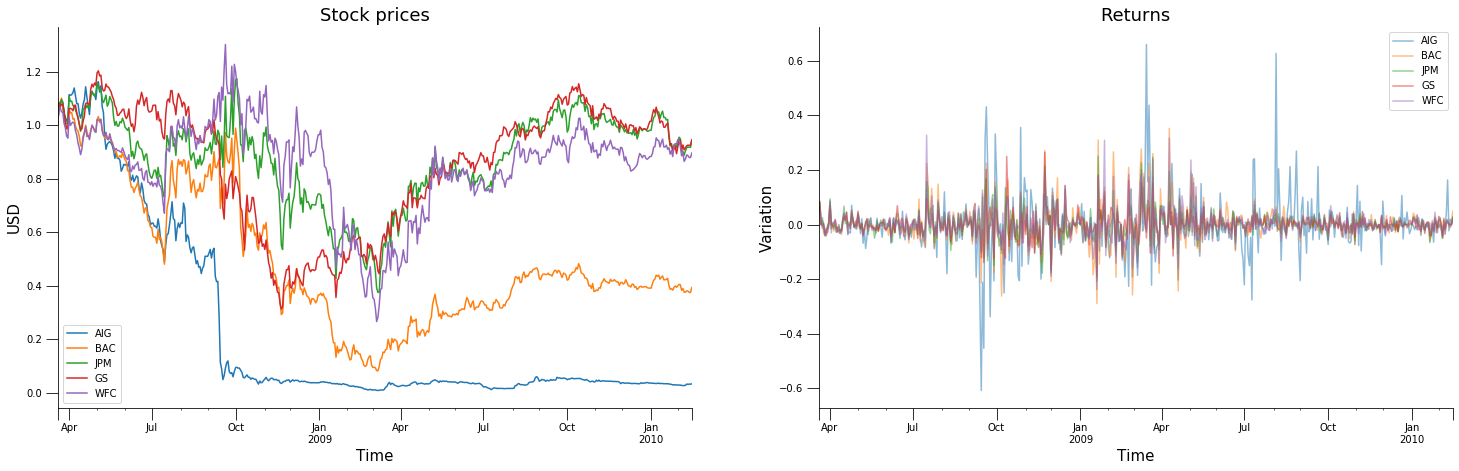

In [15]:
fig, ax = plt.subplots(1,2, figsize = (25,7))
for col in ['AIG', 'BAC', 'JPM', 'GS', 'WFC']:
  df[col][:500].apply(lambda x: x / df[col][0]).plot(ax=ax[0])
  rt[col][:500].plot(ax = ax[1], alpha=0.5)
for i in ax:
  i.legend()
  i.spines['top'].set_visible(False)
  i.spines['right'].set_visible(False)
  i.tick_params(size=12)
  i.set_xlabel('Time', fontsize = 15)
ax[0].set_ylabel('USD', fontsize = 15)
ax[1].set_ylabel('Variation', fontsize = 15)
ax[0].set_title('Stock prices', fontsize=18)
ax[1].set_title('Returns', fontsize = 18);

## Hierarchical clustering

We now perform our clustering analysis by starting to look at correlations between all pairs of time series returns. The heat map representation of the correlation matrix is shown below (we consider the Pearson correlation).

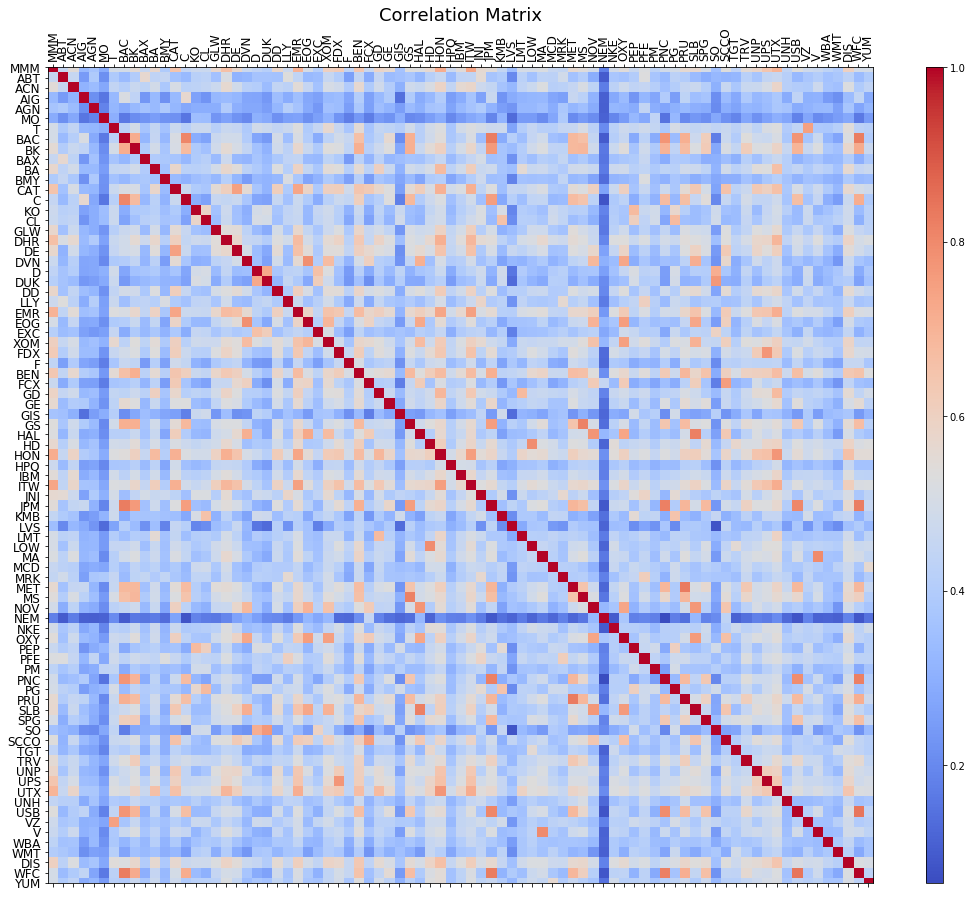

In [16]:
corr = rt.corr()   #correlation matrix of the returns

fig, ax = plt.subplots(1,1,figsize=(19, 15))
hm = ax.matshow(corr, cmap = 'coolwarm')
plt.xticks(range(rt.shape[1]), rt.columns, fontsize=12, rotation=90)
plt.yticks(range(rt.shape[1]), rt.columns, fontsize=12)
plt.colorbar(hm, aspect=50)
plt.title('Correlation Matrix', fontsize=18);

In the heat map above, red colors indicate high correlation, while blue colors indicate low correlation. We have perfect 1 correlation in the diagonal (clearly, a stock series is perfectly correlated with itself). We show below an example of two time series with highly correlated returns (MET and PRU) and two with lowly correlated returns (NEM and NKE). We show both the prices and the respective returns (for the sake of visualization, we take just a small time window for the returns).

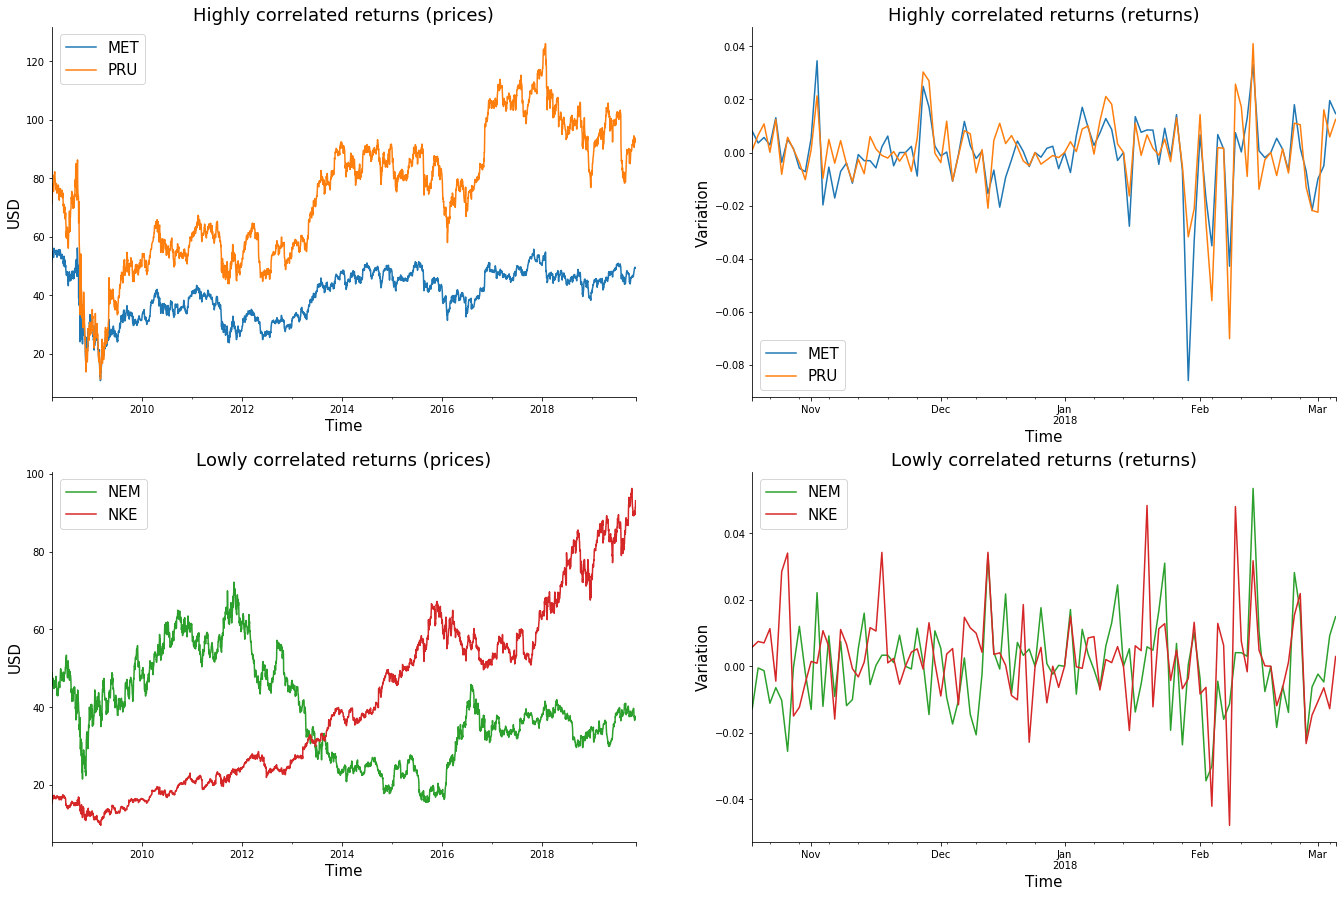

In [18]:
fig, ax = plt.subplots(2,2,figsize=(23,15))
tup = [('MET', 'PRU'), ('NEM', 'NKE')]
col = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
t = ['Highly correlated returns', 'Lowly correlated returns']
for i,j in enumerate(ax):
  df[tup[i][0]].plot(ax=j[0], color = col[2*i])
  df[tup[i][1]].plot(ax=j[0], color = col[2*i+1])
  rt[tup[i][0]][2500:2600].plot(ax=j[1], color =col[2*i])
  rt[tup[i][1]][2500:2600].plot(ax=j[1], color = col[2*i+1])
  j[0].set_title(t[i]+' (prices)', fontsize = 18)
  j[1].set_title(t[i]+' (returns)', fontsize = 18)
  j[0].set_ylabel('USD', fontsize=15)
  j[1].set_ylabel('Variation', fontsize=15)
for i in ax:
  for j in i:
    j.spines['top'].set_visible(False)
    j.spines['right'].set_visible(False)
    j.set_xlabel('Time', fontsize=15)
    j.legend(fontsize=15);
    

We perform a hierarchical clustering analysis to see the emergence of clusters in the correlation matrix. Hierarchical clustering by iteratively grouping together groups of highly correlated returns (using the average method). We use the python method pdist to obtain the distances $d_{i,j}$ between clusters $i$ and $j$ from the correlation $\rho_{i,j}$. Hereunder, we arbitrary cut the dendrogram at $d_{i,j} = 1$ (actually, not completely arbitrary, see the following), and we can see the emergence of some clusters.

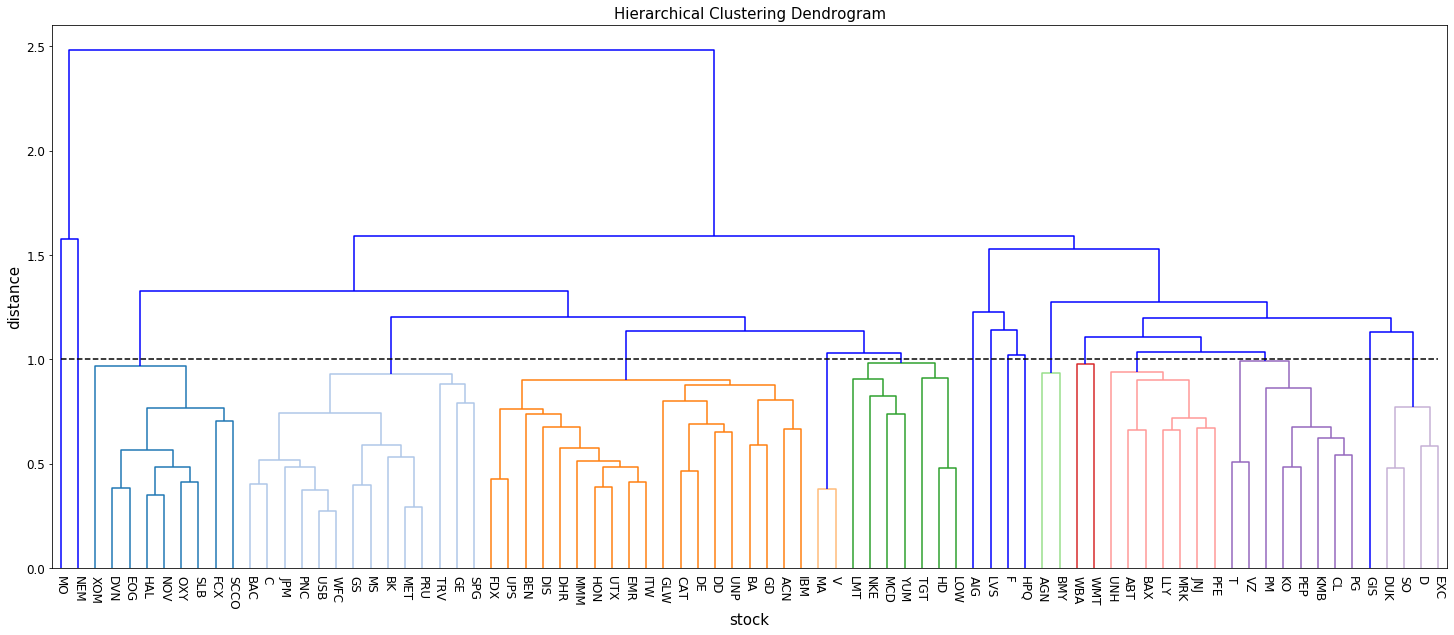

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import pdist
from matplotlib import cm
import matplotlib as mpl

Z = linkage(pdist(corr), 'average')    #compute pairwise distances

plt.figure(figsize=(25, 10))
set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cm.tab20.colors])
plt.title('Hierarchical Clustering Dendrogram', fontsize=15)
plt.xlabel('stock', fontsize=15)
plt.ylabel('distance', fontsize=15)

#dendrogram with cutoff = 1

dend = dendrogram(Z, leaf_rotation=90., leaf_font_size=8., 
                  labels = corr.columns, color_threshold = 1., 
                  above_threshold_color = 'b')
plt.yticks(fontsize=12)
x = plt.xticks(rotation=-90, fontsize=12)
plt.hlines(1.,x[0][0], x[0][-1], linestyle = '--', color = 'k')
plt.show()

Let's look inside the clusters, to see whether the sectors configuration is well reflected or not, always keeping in mind that the cutoff choise was arbitrary. The dendrogram returns us the x and y coordinates and the color of each $\Pi$ structure in the tree above. To get the clusters, we consider the fact that leaves in the dendrogram are positioned at x coordinates 5,15,25,35... Using also the y coordinates of the dendrogram and the color of links, we can recover to which cluster belongs each leaf, based on the cutoff that we have chosen.


In [21]:
#first, get clusters of leaves indexing, e.g. cluster 1 = {22,23,24}, ecc..
from collections import defaultdict, Counter

clusters = defaultdict(list)
for c, x in zip(dend['color_list'], dend['icoord']):
    for k in x[1:3]:
        i = (k - 5.0)
        if i % 10 < 1e-10:
            clusters[c].append(int(i/10))

#then, get the company name to which corresponds each leaf index and save
# them in the clusters, e.g.: cluster 1 = {'AIG', 'GS', 'BK'}, ecc..

leaves = dend['leaves'].copy()

for c in clusters:
  l = []
  for i in clusters[c]:
    l.append( corr.columns[leaves[i]])
    clusters[c] = list(set(l))

#finally, print the clusters' companies together with their sectors

for j,c in enumerate(clusters):
  if c != 'b':
    m = [] 
    for i in clusters[c]:
      m.append(sector[i])
    print(f'Cluster {j}:', list(zip(clusters[c], m)))

Cluster 1: [('OXY', 'Basic Materials'), ('DVN', 'Basic Materials'), ('NOV', 'Basic Materials'), ('FCX', 'Basic Materials'), ('HAL', 'Basic Materials'), ('SLB', 'Basic Materials'), ('XOM', 'Basic Materials'), ('EOG', 'Basic Materials'), ('SCCO', 'Basic Materials')]
Cluster 2: [('PRU', 'Financial'), ('BK', 'Financial'), ('C', 'Financial'), ('BAC', 'Financial'), ('JPM', 'Financial'), ('MS', 'Financial'), ('USB', 'Financial'), ('TRV', 'Financial'), ('GE', 'Industrial Goods'), ('SPG', 'Financial'), ('MET', 'Financial'), ('PNC', 'Financial'), ('GS', 'Financial'), ('WFC', 'Financial')]
Cluster 3: [('UPS', 'Services'), ('GD', 'Industrial Goods'), ('CAT', 'Industrial Goods'), ('FDX', 'Services'), ('ACN', 'Technology'), ('HON', 'Industrial Goods'), ('DE', 'Industrial Goods'), ('UTX', 'Industrial Goods'), ('UNP', 'Services'), ('IBM', 'Technology'), ('BEN', 'Financial'), ('ITW', 'Industrial Goods'), ('BA', 'Industrial Goods'), ('GLW', 'Technology'), ('MMM', 'Industrial Goods'), ('EMR', 'Industrial

We can see that there are clusters in which a sector is prevailing. For example, the basic material sector in cluster 1, the financial sector in cluster 2, the health care sector in cluster 8 and others. Hereunder, we plot again the correlation matrix, with columns and rows ordered according to the leaf order returned by the dendrogram, so that the cluster structure is visually easier to detect. For example, it is very evident how the basic material sector and the financial sector are highly clustered.


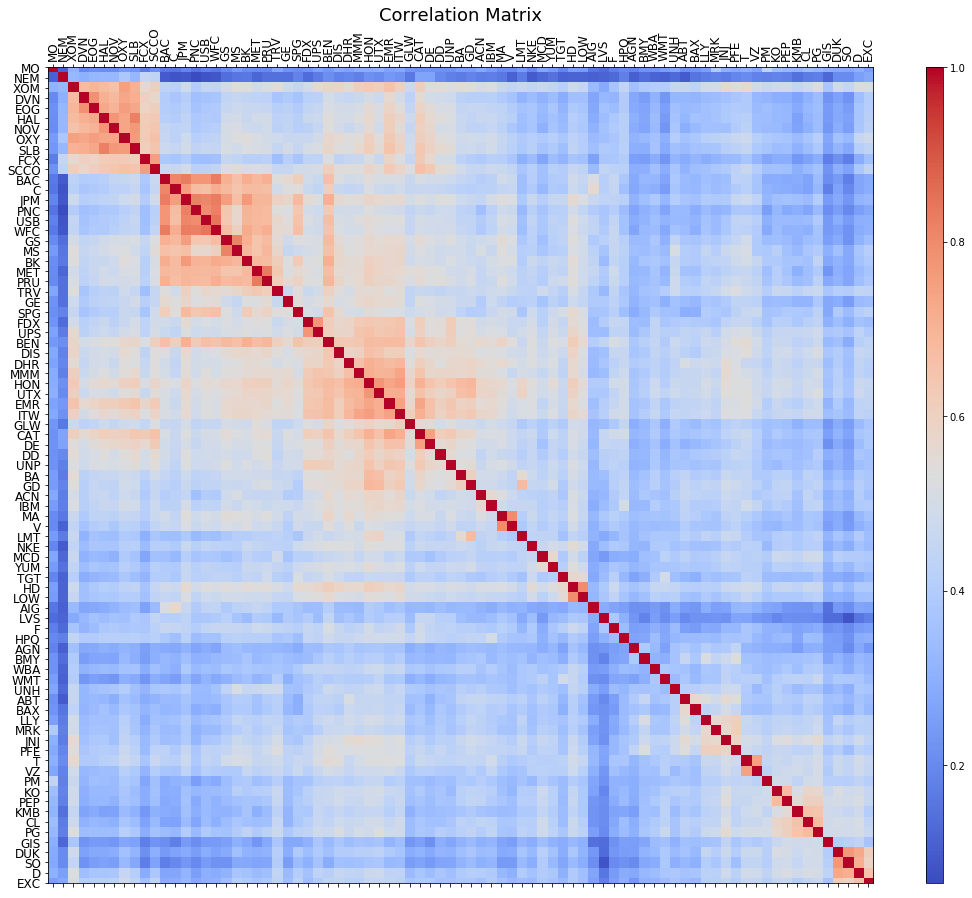

In [22]:
sort = rt[rt.columns.values[leaves]]  # returns sorted with leaves order

corr1 = sort.corr()
fig, ax = plt.subplots(1,1,figsize=(19, 15))
hm = ax.matshow(corr1, cmap = 'coolwarm')
plt.xticks(range(sort.shape[1]), sort.columns, fontsize=12, rotation=90)
plt.yticks(range(sort.shape[1]), sort.columns, fontsize=12)
plt.colorbar(hm, aspect=50)
plt.title('Correlation Matrix', fontsize=18);

Since cutting the dendogram at 1 was an arbitrary choice, we explore the hierarchical emergence of clusters a little bit more. Basically, we take a range of different cutoffs, from 0.5 to 1.5, and collect the clusters. In each cluster, we check what is the most represented sector, and we save the fraction of companies belonging this sector with respect to the total number of companies in the cluster. For example, if in a cluster we have 5 companies belonging to the financial sector, 2 belonging to healthcare and one belonging to industrial goods, the financial sector is the most represented with a fraction of companies equal to 5/8. We call this fraction the sector's clustering score. We do the same for every cluster, and for every cutoff value. We then plot the cutoffs vs. the sectors' clustering scores.

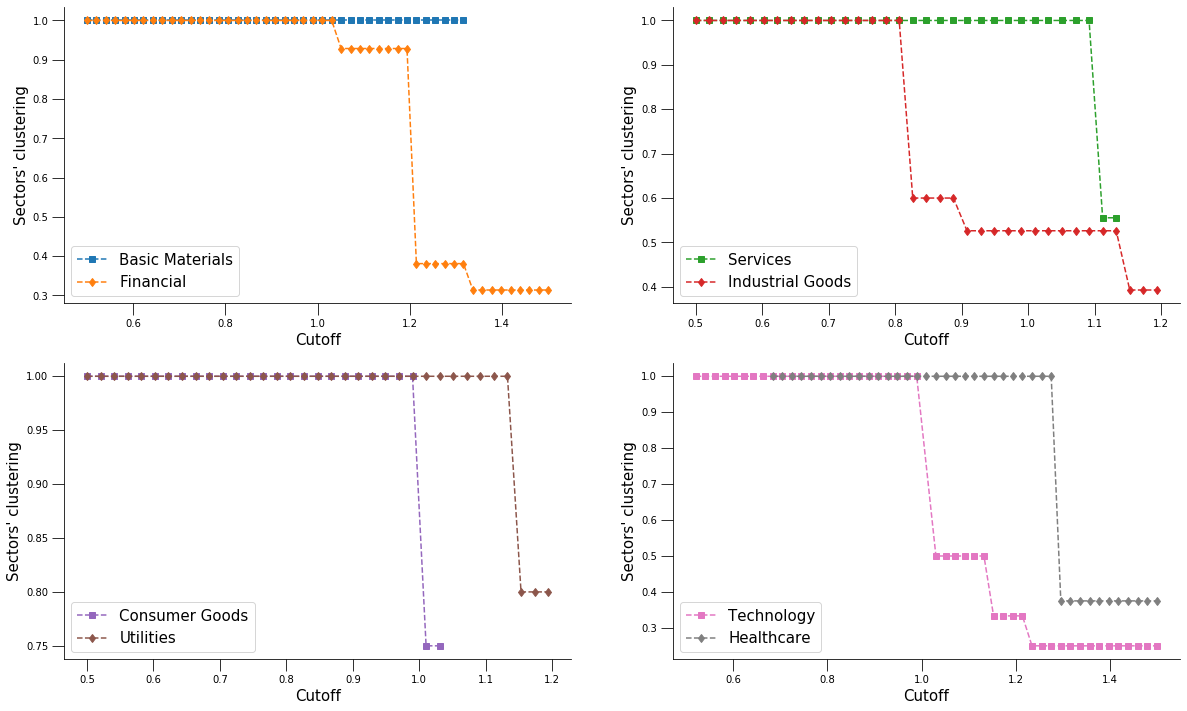

In [24]:

#we basically do exactly the same as before, but for different cutoff values

cutoffs = np.linspace(0.5,1.5,50)
tot = defaultdict(list)

for cut in cutoffs:
  Z = linkage(pdist(corr), 'average')
  dend = dendrogram(Z, leaf_rotation=90., leaf_font_size=8., 
                    labels = corr.columns, color_threshold = cut, 
                    above_threshold_color = 'b', no_plot=True)

  clusters = defaultdict(list)
  for c, x in zip(dend['color_list'], dend['icoord']):
      for k in x[1:3]:
          i = (k - 5.0)
          if i % 10 < 1e-10:
              clusters[c].append(int(i/10))

  leaves = dend['leaves'].copy()

  for c in clusters:
    l = []
    for i in clusters[c]:
      l.append( corr.columns[leaves[i]])
      clusters[c] = list(set(l))

  dd = defaultdict(list)
  count = []
  for j,c in enumerate(clusters):
    if c != 'b':
      m = [] 
      for i in clusters[c]:
        m.append(sector[i])
      if len(m) > 1:
            #for each cluster greater than 1, we look at the sectors' presence
        count.append(Counter(m))   
  for test in count:
    top = test.most_common()[0]
            #we save the score of the most represented sector, for each cluster
    dd[top[0]].append(  top[1] / sum(test.values()) )  
  for s in dd: 
          #if a sector is the most represented one in more than one cluster, 
          #we take the most significant
    tot[s].append((cut, max(dd[s])))   

#plot the results

fig, ax = plt.subplots(2,2,figsize=(20,12))
markers = ['s', 'd']
for k,i in enumerate(tot):
  x, y = list(zip(*tot[i]))
  j = (k / 2)
  ax[ int(j/2) ][ int( j%2 ) ].plot( x, y, label = i, linestyle = '--', color = cm.tab10.colors[k], marker = markers[ int( (k%4)%2 ) ] )
  ax[ int(j/2) ][ int( j%2 ) ].legend(fontsize = 15)
  ax[ int(j/2) ][ int( j%2 ) ].set_xlabel('Cutoff', fontsize = 15)
  ax[ int(j/2) ][ int( j%2 ) ].set_ylabel('Sectors\' clustering', fontsize = 15)
  ax[ int(j/2) ][ int( j%2 ) ].spines['top'].set_visible(False)
  ax[ int(j/2) ][ int( j%2 ) ].spines['right'].set_visible(False)
  ax[ int(j/2) ][ int( j%2 ) ].tick_params(size=12);

We can see that each sector clusters perfectly for a wide range of different cutoffs. By saying this, we do not mean that all the companies belonging to the same sector necessarily group together, but that at least some of them group together in clusters where there are no other sectors (100% presence). This analysis for different cutoffs tests the robustness of the sectors' clustering, which otherwise would have depended on an arbitrary choice for the cutoff. \\
Now we will see the same effect with a different approach which is still based on the correlation matrix, namely the minimum spannin tree.

## Minimum spanning tree

We first build a complete undirected weighted network based on the correlation matrix, but taking a distance measure instead of the correlation as weights. The distance is conceptually the opposite of the correlation (two highly correlated returns must have a small distance), and as a distance $w_{ij}$ based on the correlation $\rho_{ij} $ between two returns $i$ and $j$ we take:

$$ w_{ij} = \sqrt{2(1-\rho_{ij})} $$

We use this measure to build our complete weighted network of stock returns. After that, we take the minimum spanning tree, i.e. the subset of the edges that connects all the vertices together, without any cycles and with the minimum possible total edge weight (in our case, distance). The result is a tree in which the return correlation between connected nodes is as high as possible. In this way, we should easily spot whether sectors cluster or not.


In [26]:
#edge weights (distances) of the complete network

n = corr.columns.values
ew = [( n[i], n[j], np.sqrt(2*(1-corr.loc[n[i], n[j]]))  )
 for i in range(len(n)) for j in range(i+1, len(n))]
ew[:10]

[('MMM', 'ABT', 1.040340680238948),
 ('MMM', 'ACN', 0.9549737403697901),
 ('MMM', 'AIG', 1.1571182286205566),
 ('MMM', 'AGN', 1.123497179022719),
 ('MMM', 'MO', 1.192131658913481),
 ('MMM', 'T', 1.0000950931679777),
 ('MMM', 'BAC', 1.0000870115025822),
 ('MMM', 'BK', 0.9440262526650607),
 ('MMM', 'BAX', 1.0371480106239652),
 ('MMM', 'BA', 0.9249473970564448)]

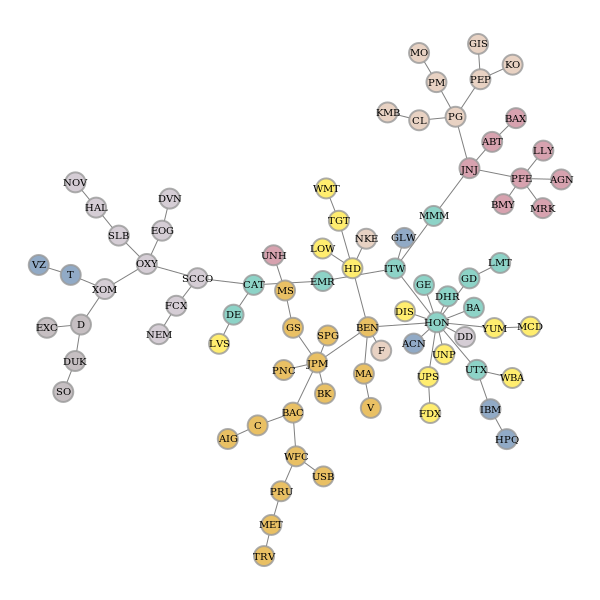

In [27]:
from graph_tool.all import *

#build complete network

g = Graph(directed=False)
elist = [( n[i], n[j], np.sqrt(2*(1-corr.loc[n[i], n[j]]))  ) for i in range(len(n)) for j in range(i+1, len(n))]
eweight = g.new_ep("double")
vlabel = g.add_edge_list(elist, hashed=True, string_vals=True, eprops=[eweight])

#spannig tree with colors according to sectors

span = g.new_ep("double")
span = min_spanning_tree(g, weights = eweight)
u = GraphView(g, efilt=span)
vcol = u.new_vp('int')
s = list(set(sector.values()))
maps = {s[i]: i for i in range(len(s))  }
for v in u.vertices():
  vcol[v] = maps[sector[vlabel[v]]]
u.vp['sector'] = vcol
deg = u.degree_property_map('total')
graph_draw(u, pos = sfdp_layout(u, p = 2.8), vertex_text = vlabel, vertex_text_position = -10, vertex_text_color = 'k', vertex_font_size=10,
           bg_color = (1,1,1,1),  vertex_size = 20,  edge_color='grey', vertex_fill_color= vcol, 
           edge_pen_width = 1);

We can see from the minimum spanning tree that same sectors' companies have the tendency to cluster together. We can measure quantitavely this effect by looking at the fraction of same sector's neighbors of a node, for each node.

In [28]:
l = []
for v in u.vertices():
  vp = u.vp['sector'][v]
  neis =  u.get_all_neighbors(u.vertex(v), vprops = [u.vp['sector']])
  ns = np.array([x[1] for x in neis])
  l.append( len( ns[ns==vp] ) / len (ns))
real = np.mean(l)
print('Average fraction of same sector\'s neighbors:', real)

Average fraction of same sector's neighbors: 0.7719531497309275


The average fraction of same sector's neighbors is 0.77. Since there are 8 different sectors, this value is significant. We can easily test this significance by comparing it with a very simple null model, obtanined by randomly shuffling the companies' sectors in the spanning tree. The results are shown below.



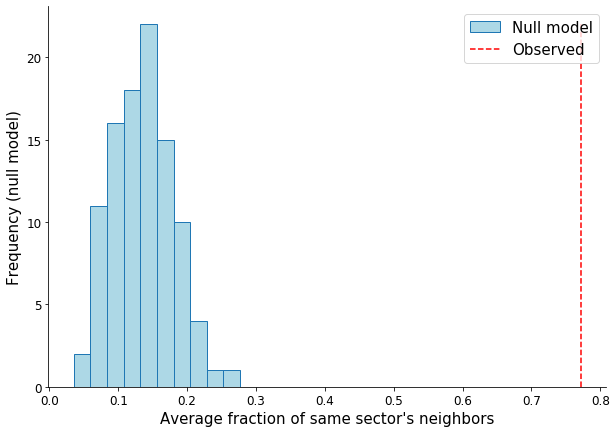

In [29]:
import random

null = []

for k in range(100):
  u = GraphView(g, efilt=span)
  vcol = u.new_vp('int')
  keys = list(sector.keys())
  values = list(sector.values())
  random.shuffle(values)
  rsector = {keys[i]: values[i] for i in range(len(keys))  }
  s = list(set(rsector.values()))
  maps = {s[i]: i for i in range(len(s))  }
  for v in u.vertices():
    vcol[v] = maps[rsector[vlabel[v]]]
  u.vp['sector'] = vcol
  l = []
  for v in u.vertices():
    vp = u.vp['sector'][v]
    neis =  u.get_all_neighbors(u.vertex(v), vprops = [u.vp['sector']])
    ns = np.array([x[1] for x in neis])
    l.append( len( ns[ns==vp] ) / len (ns))

  null.append(np.mean(l))

fig, ax = plt.subplots(1,1,figsize=(10,7))
h = plt.hist(null, bins = 10, color = 'lightblue', edgecolor = 'tab:blue', label = 'Null model')
plt.vlines(real, 0, max(h[0]), linestyle = '--', color = 'r', label = 'Observed' )
plt.legend(fontsize = 15)
plt.xlabel('Average fraction of same sector\'s neighbors', fontsize = 15)
plt.ylabel('Frequency (null model)', fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

We can see that the observed value is far away from the 100 values of the null model and is indeed significant.

## Conclusion

We have collected the historical time series of different companies that are listed in the New York Stock Exchange. After a brief data exploration, we have seen how a clustering analysis, based on the pearson correlation between price returns, clearly show that companies belonging to the same sector tend to cluster together, meaning that they move together in the market. This effect has been shown first though a hierarchical clustering analysis and secondly by looking at the minimum spanning tree structure.